In [1]:
import pypsa
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\lenovo\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
# Create the pypsa network
network = pypsa.Network()

In [3]:
# Define snapshots (time steps)
demand_data = pd.read_csv(r"C:\Users\lenovo\Downloads\Ghana_Hourly_Demand_Profile_2023_Final.csv",index_col=0, parse_dates=True)

In [4]:
demand_data.head()

,Demand (MW)
Timestamp,
2023-01-01 00:00:00,1769.136225
2023-01-01 01:00:00,2596.727941
2023-01-01 02:00:00,2282.567457
2023-01-01 03:00:00,2091.050165
2023-01-01 04:00:00,1455.261412


In [5]:
demand_data["Demand (MW)"]

Timestamp
2023-01-01 00:00:00    1769.136225
2023-01-01 01:00:00    2596.727941
2023-01-01 02:00:00    2282.567457
2023-01-01 03:00:00    2091.050165
2023-01-01 04:00:00    1455.261412
                          ...     
2023-12-31 19:00:00    2458.698586
2023-12-31 20:00:00    1562.235805
2023-12-31 21:00:00    1701.665052
2023-12-31 22:00:00    1532.643989
2023-12-31 23:00:00    1937.672358
Name: Demand (MW), Length: 8760, dtype: float64

In [6]:
network.set_snapshots(demand_data.index)

In [7]:
network.snapshots

DatetimeIndex(['2023-01-01 00:00:00', '2023-01-01 01:00:00',
               '2023-01-01 02:00:00', '2023-01-01 03:00:00',
               '2023-01-01 04:00:00', '2023-01-01 05:00:00',
               '2023-01-01 06:00:00', '2023-01-01 07:00:00',
               '2023-01-01 08:00:00', '2023-01-01 09:00:00',
               ...
               '2023-12-31 14:00:00', '2023-12-31 15:00:00',
               '2023-12-31 16:00:00', '2023-12-31 17:00:00',
               '2023-12-31 18:00:00', '2023-12-31 19:00:00',
               '2023-12-31 20:00:00', '2023-12-31 21:00:00',
               '2023-12-31 22:00:00', '2023-12-31 23:00:00'],
              dtype='datetime64[ns]', name='snapshot', length=8760, freq=None)

In [8]:
Demand__2030 = demand_data["Demand (MW)"]*1.5553

In [9]:
Demand__2030["increased_demand"]  = demand_data["Demand (MW)"]*1.5553

In [10]:
Demand__2030["increased_demand"].sum()/1000000

26.440099999954896

In [11]:
Demand__2030

Timestamp
2023-01-01 00:00:00                                          2751.537571
2023-01-01 01:00:00                                          4038.690967
2023-01-01 02:00:00                                          3550.077166
2023-01-01 03:00:00                                          3252.210322
2023-01-01 04:00:00                                          2263.368074
                                             ...                        
2023-12-31 20:00:00                                          2429.745348
2023-12-31 21:00:00                                          2646.599655
2023-12-31 22:00:00                                          2383.721196
2023-12-31 23:00:00                                          3013.661818
increased_demand       Timestamp
2023-01-01 00:00:00    2751.537571
2...
Name: Demand (MW), Length: 8761, dtype: object

In [12]:
# add buses
network.add("Bus","electricity")

In [13]:
#Add loads with an hourly demand profile
network.add("Load","demand", bus="electricity", p_set=Demand__2030["increased_demand"])

In [14]:
network.snapshots

DatetimeIndex(['2023-01-01 00:00:00', '2023-01-01 01:00:00',
               '2023-01-01 02:00:00', '2023-01-01 03:00:00',
               '2023-01-01 04:00:00', '2023-01-01 05:00:00',
               '2023-01-01 06:00:00', '2023-01-01 07:00:00',
               '2023-01-01 08:00:00', '2023-01-01 09:00:00',
               ...
               '2023-12-31 14:00:00', '2023-12-31 15:00:00',
               '2023-12-31 16:00:00', '2023-12-31 17:00:00',
               '2023-12-31 18:00:00', '2023-12-31 19:00:00',
               '2023-12-31 20:00:00', '2023-12-31 21:00:00',
               '2023-12-31 22:00:00', '2023-12-31 23:00:00'],
              dtype='datetime64[ns]', name='snapshot', length=8760, freq=None)

In [15]:
# t/MWh thermal
emission_factors = dict(
    gas=0.2,
    oil=0.26,
    hydro=0,
    solar=0,
    wind=0,
    nuclear=0
)

In [16]:
#Add generators with their profiles
network.add("Generator","gas_plant", bus="electricity",
           p_nom=1887, marginal_cost=50, capital_cost=1200,
            carrier="gas", efficiency=0.55
           )
network.add("Generator","oil_plant", bus="electricity",
           p_nom=1502, marginal_cost=100, capital_cost=1200,
            carrier="oil",efficiency=0.35
           )
network.add("Generator","hydro_plant", bus="electricity",
           p_nom=1580, marginal_cost=0, capital_cost=3000, 
            carrier="hydro",efficiency=0.85
           )
network.add("Generator","solar_plant", bus="electricity",
           p_nom=474, marginal_cost=0, capital_cost=1141.6,
            carrier="solar",efficiency=0.20
           )
network.add("Generator","wind_plant", bus="electricity",
           p_nom=100, marginal_cost=0, capital_cost=1341.6,
            carrier="wind",efficiency=0.40
           )
network.add("Generator", "nuclear_plant", bus="electricity",
            p_nom=1000, marginal_cost=10, capital_cost=5500,
            carrier="nuclear", efficiency=0.33)

In [17]:
emission_factors

{'gas': 0.2, 'oil': 0.26, 'hydro': 0, 'solar': 0, 'wind': 0, 'nuclear': 0}

In [18]:
network.optimize(solver_name="highs")

<__array_function__ internals>:200: RuntimeWarning:

invalid value encountered in cast

INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|█████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.22it/s]
INFO:linopy.io: Writing time: 0.62s
INFO:linopy.solvers:Log file at C:\Users\lenovo\AppData\Local\Temp\highs.log.
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 52560 primals, 113880 duals
Objective: 1.52e+08
Solver model: available
Solver message: optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper were not assigned to the network.


('ok', 'optimal')

In [19]:
network.objective/1e6 #total system costs in million

152.32889219091211

In [20]:
network.generators.p_nom_opt.div(1e3) #GW

Generator
gas_plant        1.887
oil_plant        1.502
hydro_plant      1.580
solar_plant      0.474
wind_plant       0.100
nuclear_plant    1.000
Name: p_nom_opt, dtype: float64

In [21]:
network.snapshot_weightings.generators @ network.generators_t.p.div(1e6) #TWh

Generator
gas_plant         1.886783
oil_plant         0.000000
hydro_plant      13.726103
solar_plant       4.152240
wind_plant        0.876000
nuclear_plant     5.798974
Name: generators, dtype: float64

In [22]:
base_results = network.generators_t.p.sum(axis=0)

In [23]:
base_results

Generator
gas_plant        1.886783e+06
oil_plant        0.000000e+00
hydro_plant      1.372610e+07
solar_plant      4.152240e+06
wind_plant       8.760000e+05
nuclear_plant    5.798974e+06
dtype: float64

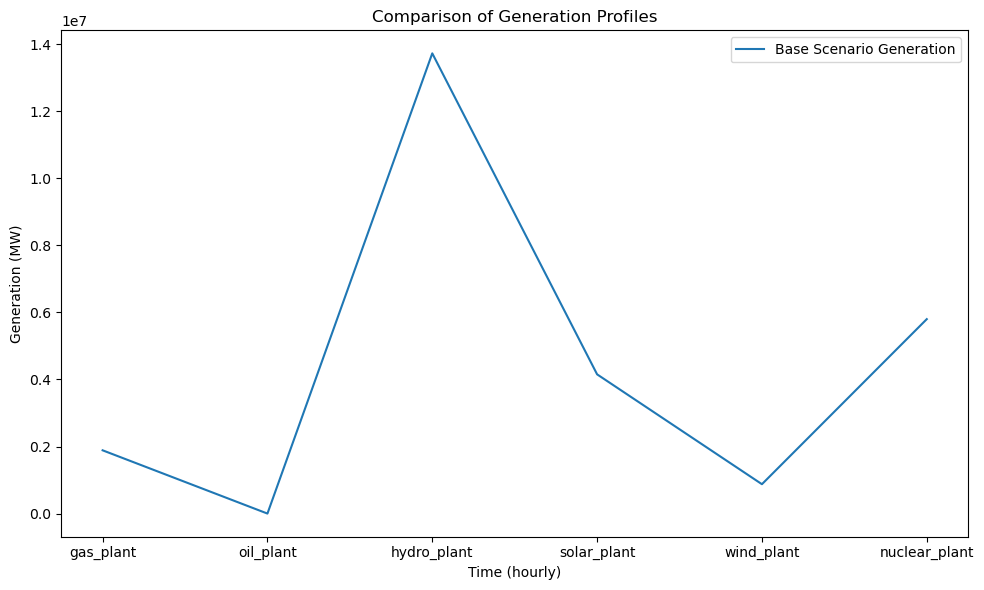

In [24]:
# Compare generation profiles
plt.figure(figsize=(10, 6))
plt.plot(base_results, label="Base Scenario Generation")
plt.title("Comparison of Generation Profiles")
plt.xlabel("Time (hourly)")
plt.ylabel("Generation (MW)")
plt.legend()
plt.tight_layout()
plt.show()

In [25]:
#Check if demand was consistently met in all hours using (load data) and  (generation output).
network.loads_t.p 

Load,demand
snapshot,
2023-01-01 00:00:00,2751.537571
2023-01-01 01:00:00,4038.690967
2023-01-01 02:00:00,3550.077166
2023-01-01 03:00:00,3252.210322
2023-01-01 04:00:00,2263.368074
...,...
2023-12-31 19:00:00,3824.013911
2023-12-31 20:00:00,2429.745348
2023-12-31 21:00:00,2646.599655


In [26]:
network.generators_t.p

Generator,gas_plant,oil_plant,hydro_plant,solar_plant,wind_plant,nuclear_plant
snapshot,,,,,,
2023-01-01 00:00:00,-0.000000,-0.0,1580.0,474.0,100.0,597.537571
2023-01-01 01:00:00,884.690967,-0.0,1580.0,474.0,100.0,1000.000000
2023-01-01 02:00:00,396.077166,-0.0,1580.0,474.0,100.0,1000.000000
2023-01-01 03:00:00,98.210322,-0.0,1580.0,474.0,100.0,1000.000000
2023-01-01 04:00:00,-0.000000,-0.0,1580.0,474.0,100.0,109.368074
...,...,...,...,...,...,...
2023-12-31 19:00:00,670.013911,-0.0,1580.0,474.0,100.0,1000.000000
2023-12-31 20:00:00,-0.000000,-0.0,1580.0,474.0,100.0,275.745348
2023-12-31 21:00:00,-0.000000,-0.0,1580.0,474.0,100.0,492.599655


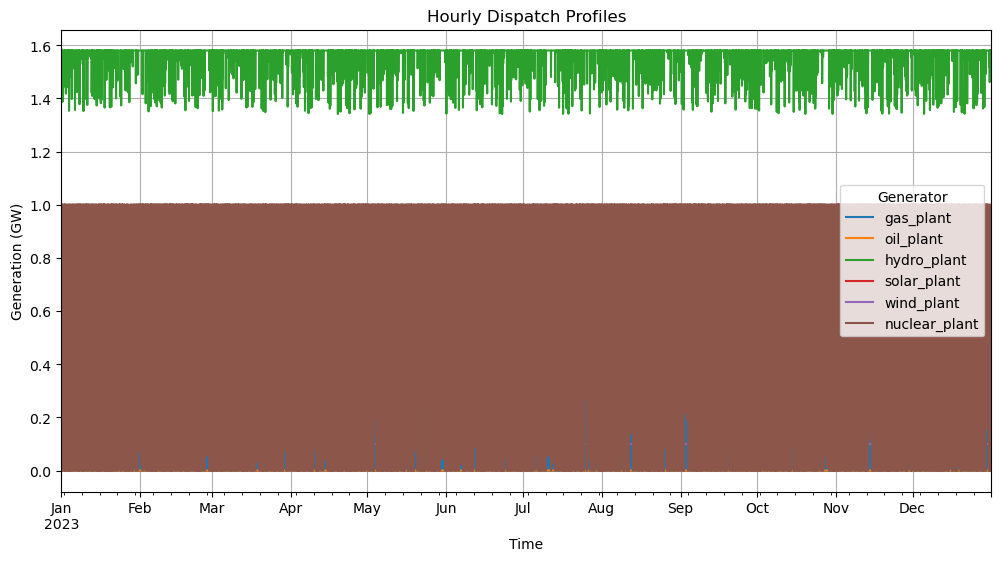

In [27]:
# Plot hourly generation profiles
generation_profiles = network.generators_t.p / 1e3  # Convert MW to GW
generation_profiles.plot(
    figsize=(12, 6),
    title="Hourly Dispatch Profiles",
    xlabel="Time",
    ylabel="Generation (GW)"
)
plt.legend(title="Generator")
plt.grid(True)
plt.show()

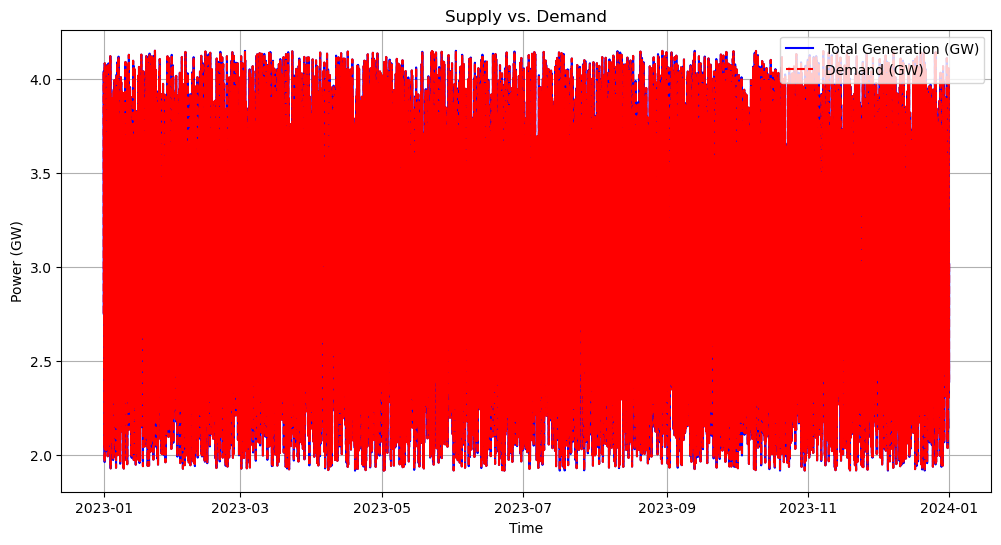

In [28]:
# Calculate total generation and demand
total_generation = generation_profiles.sum(axis=1)  # Sum across generators
demand = network.loads_t.p.sum(axis=1) / 1e3  # Convert MW to GW

# Plot demand vs supply
plt.figure(figsize=(12, 6))
plt.plot(total_generation, label="Total Generation (GW)", color="blue")
plt.plot(demand, label="Demand (GW)", color="red", linestyle="--")
plt.title("Supply vs. Demand")
plt.xlabel("Time")
plt.ylabel("Power (GW)")
plt.legend()
plt.grid(True)
plt.show()

In [29]:
# Calculate CO2 emissions
emissions = 0
for gen_name, gen in network.generators.iterrows():
    carrier = gen.carrier
    emission_factor = emission_factors[carrier]  # tons of CO2 per MWh
    emissions += (network.generators_t.p[gen_name] * emission_factor).sum()

In [30]:
emissions

377356.60290059604

In [31]:
# Convert emissions to kilotons
total_emissions_kt = emissions / 1e3

In [32]:
total_emissions_kt

377.35660290059604